In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils import read_input
import numpy as np

INPUT_PATH = os.path.abspath("../inputs/day6/puzzle1.txt")

input_data = read_input(INPUT_PATH)[0]

In [2]:
timers = np.array([int(x) for x in input_data.split(",")])
spawn = timers == 0

for day in range(80):
    # Decrement timer
    timers -= 1
    # Reset timer
    timers[spawn] = 6
    # Add fish 
    timers = np.concatenate((timers, np.ones((np.sum(spawn),), dtype=int)*8))
    # Which fish to add next day
    spawn = timers == 0
print(f"After day {day + 1} - {timers.shape[0]} fish")

After day 80 - 362639 fish


In [17]:
class SchoolOfLaternfish:
    states = list(range(-1, 9))
    
    def __init__(self, initial_states):
        self.state_counter = {state: 0 for state in self.states}
        for state in initial_states:
            self.state_counter[state] += 1
        self.num_spawn = self.state_counter[0]
        
    def next_day(self):
        self.decrement_timer()
        self.reset_timer()
        self.spawn_fish()
        
    def decrement_timer(self):
        for state in self.states[1:]:
            self.state_counter[state - 1] = self.state_counter[state]
            self.state_counter[state] = 0

    def reset_timer(self):
        self.state_counter[6] += self.num_spawn
        self.state_counter[-1] = 0
        
    def spawn_fish(self):
        self.state_counter[8] = self.num_spawn
        self.num_spawn = self.state_counter[0]
        
    def simulate_days(self, num_days):
        growth = []
        growth.append(sum(self.state_counter.values()))
        for i in range(num_days):
            self.next_day()
            growth.append(sum(self.state_counter.values()))
        print(f"Day {i+1}: {sum(self.state_counter.values())}")
        return np.array(growth)

In [18]:
initial_states = np.array([int(x) for x in input_data.split(",")])

In [21]:
school = SchoolOfLaternfish(initial_states)

growth = school.simulate_days(256)

Day 256: 1639854996917


In [22]:
import matplotlib.pyplot as plt

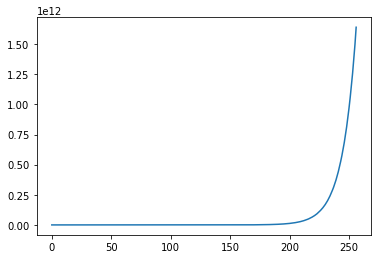

In [25]:
%matplotlib inline
plt.plot(np.arange(growth.shape[0]), growth)